# Week 12
# Image Classification with Convolutional Neural Network (CNN)

### Ideas
- Dense layers may contain redudent connections
- Some information should be invariant to spacial translation
- The number of parameters can be reduced if certain weights share the same value.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS4LZdFg5QPbgDb-jvP-YT0N51eRkWg45uF0ybsB5k0Ubr0-gOC&usqp=CAU" width="400">

## 2D Convolution Layer
<img src="https://cdn-media-1.freecodecamp.org/images/Gjxh-aApWTzIRI1UNmGnNLrk8OKsQaf2tlDu" width="600">

**2D smoothing with Gaussian kernel**

<img src="https://www.cs.umd.edu/class/fall2016/cmsc426/matlab/filters/html/filters_tutorial_03.png" width="400"><img src="https://www.mathworks.com/help/examples/stats/win64/ComputeTheMultivariateNormalPdfExample_01.png" width="200">

**Edge detection**

<img src="https://aishack.in/static/img/tut/conv-line-detection-horizontal-result.jpg" width="400"><img src="https://www.researchgate.net/profile/Ching-Wei_Wang/publication/221472523/figure/fig5/AS:305540338077700@1449857901164/Convolution-filter-for-simple-edge-detect.png" width="200">

## LeNet5 on MNIST

Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner proposed a neural network architecture for handwritten and machine-printed character recognition in 1990’s which they called LeNet-5. It is one of the early example of a convolutional neural network

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png" width="600">

## Max-Pooling Layer
<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" width="500">

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
# import tensorflow.keras as K
print(tf.__version__)

2.1.0


In [3]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
model_cnn = tf.keras.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(filters=6,
                                 kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))

model_cnn.add(tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3, 3),
                                 activation='relu'))

model_cnn.add(tf.keras.layers.AveragePooling2D())

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(units=120,
                       activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units=84,
                       activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units=10,
                       activation='softmax'))

In [6]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        880       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               276600    
_________________________________________________________________
dense_3 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [7]:
model_cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
model_cnn.fit(x_train.reshape(list(x_train.shape) + [1]), y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 654us/sample - loss: 1.5999 - accuracy: 0.8634
Epoch 2/10
60000/60000 [==============================] - 40s 672us/sample - loss: 1.4915 - accuracy: 0.9706
Epoch 3/10
60000/60000 [==============================] - 39s 650us/sample - loss: 1.4845 - accuracy: 0.9769- loss: 1.4845 - accuracy
Epoch 4/10
60000/60000 [==============================] - 32s 535us/sample - loss: 1.4803 - accuracy: 0.9812
Epoch 5/10
60000/60000 [==============================] - 31s 516us/sample - loss: 1.4773 - accuracy: 0.9841
Epoch 6/10
60000/60000 [==============================] - 31s 514us/sample - loss: 1.4751 - accuracy: 0.9862
Epoch 7/10
60000/60000 [==============================] - 32s 527us/sample - loss: 1.4742 - accuracy: 0.9872
Epoch 8/10
60000/60000 [==============================] - 31s 522us/sample - loss: 1.4734 - accuracy: 0.9878
Epoch 9/10
60000/60000 [==============================] - 32s 535us/sample - los

In [9]:
model_cnn.evaluate(x_test.reshape(list(x_test.shape) + [1]), y_test)

10000/10000 [==============================] - 2s 184us/sample - loss: 1.4746 - accuracy: 0.9866


[1.4746006938934326, 0.9866]

## Dropout and Model Regularization
For a complicated model like deep neural networks, a major concern on its performance is model overfitting:
![underfitting and overfitting](https://cdn-images-1.medium.com/max/1200/1*cdvfzvpkJkUudDEryFtCnA.png)
In plain words, overfitting happens when the model is **memorizing** the training data, and become poorly at **generalizing** what they've learned to unseen data. Think about a student who memorized the entire machine learning textbook. He may appear quite knowledgable in machine learning when asked things directly from the book, but there is no way he can perform a machine project on a dataset not mentioned in the book.

### How to dentify model overfitting?
- Visualize the model (decision boundary, regression curves, etc.)
- Observe the trends in training loss and the testing loss
![](https://cdn-images-1.medium.com/max/1600/1*vuZxFMi5fODz2OEcpG-S1g.png)

### How to prevent model overfitting?
1. Start with a simple model
![](https://image.slidesharecdn.com/lawsofwebdesign-091104020153-phpapp01/95/laws-of-web-development-11-728.jpg?cb=1257384621)
2. Add penalty to complicated models
    - L1 Regularizor
    - L2 Regularizor
    - Elastic Net

3. (For Neural Networks) Dropout layers: remove weights to the next layer
![](https://cdn-images-1.medium.com/max/1800/1*iWQzxhVlvadk6VAJjsgXgg.png)


# Image Classification with CIFAR-10 Dataset
[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is a widely used benchmark dataset for image classifiers. The dataset consists of 10 classes of color images of size $32\times 32$. Let's build a neural network with **convolutional layers** to classify the images.

### Download the dataset
- Use `request` to download the tar file from [https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)
- Use `tarfile` to extract files
- Use `pickle` to load the data

In [10]:
import requests

filename = "cifar-10-python.tar.gz"
if not os.path.isfile(filename):
    print("Downloading CIFAR10 dataset...")
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    file = requests.get(url)

    print("Writing to file", filename, "...")
    with open(filename, "wb") as f:
        f.write(file.content)

Writing to file cifar-10-python.tar.gz ...


In [14]:
import tarfile
datapath = "cifar-10-batches-py/" 
if not os.path.isdir(datapath):
    print("Extracting files...")
    tar = tarfile.open(filename)
    tar.extractall()
    print("Files extracted.")
    tar.close()
os.listdir(datapath)

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

The dataset is broken into batches to prevent your machine from running **out of memory**. The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc..

In [12]:
# load one batch
import pickle
with open(datapath + "data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding="latin1")
    features = batch['data'].reshape([len(batch['data']), 3, 32, 32]).transpose(0, 2, 3, 1)
    labels = batch['labels']
print("feature size:", features.shape)
print("label size:", len(labels))

feature size: (10000, 32, 32, 3)
label size: 10000


The label data is just a list of 10000 numbers in the range 0-9, which corresponds to each of the 10 classes in CIFAR-10. 

* **airplane**
* **automobile**
* **bird**
* **cat**
* **deer**
* **dog**
* **frog**
* **horse**
* **ship**
* **truck**

Text(0.5, 0, 'frog')

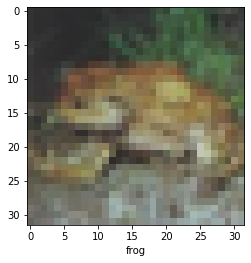

In [13]:
# Show a sample image
sample_id = 243
plt.imshow(features[sample_id])
label_names = ['airplane', 'automobile', 'bird',
            'cat', 'deer', 'dog', 'frog',
            'horse', 'ship', 'truck']
plt.xlabel(label_names[labels[sample_id]])

In [15]:
# Load all images from batch 1-5
train_features = np.empty([0, 32, 32, 3], dtype=np.uint8)
train_labels = np.empty([0])
for k in range(1, 6):
    with open(datapath + "data_batch_" + str(k), "rb") as f:
        batch = pickle.load(f, encoding="latin1")
        features = batch["data"].reshape([len(batch['data']), 3, 32, 32]).transpose(0, 2, 3, 1)
        labels=batch['labels']
        print("features shape:", features.shape)
        print("labels shape:", len(labels))
        train_features = np.append(train_features, features, axis=0)
        train_labels = np.append(train_labels, labels, axis=0)
print("train_features shape:", train_features.shape)
print("train_labels shape:", train_labels.shape)
        

features shape: (10000, 32, 32, 3)
labels shape: 10000
features shape: (10000, 32, 32, 3)
labels shape: 10000
features shape: (10000, 32, 32, 3)
labels shape: 10000
features shape: (10000, 32, 32, 3)
labels shape: 10000
features shape: (10000, 32, 32, 3)
labels shape: 10000
train_features shape: (50000, 32, 32, 3)
train_labels shape: (50000,)


## Build CNN model
### Create Convolutional Model

The entire model consists of 14 layers in total. In addition to layers below lists what techniques are applied to build the model.

1. Convolution with 64 different filters in size of (3x3)
2. Max Pooling by 2
  - ReLU activation function 
3. Convolution with 128 different filters in size of (3x3)
4. Max Pooling by 2
  - ReLU activation function 
5. Convolution with 256 different filters in size of (3x3)
6. Max Pooling by 2
  - ReLU activation function 
7. Convolution with 512 different filters in size of (3x3)
8. Max Pooling by 2
  - ReLU activation function 
9. Flattening the 3-D output of the last convolutional operations.
10. Fully Connected Layer with 128 units
  - Dropout 
11. Fully Connected Layer with 256 units
  - Dropout 
12. Fully Connected Layer with 512 units
  - Dropout 
13. Fully Connected Layer with 1024 units
  - Dropout 
14. Fully Connected Layer with 10 units (number of image classes)

the image below decribes how the conceptual convolving operation differs from the tensorflow implementation when you use [Channel x Width x Height] tensor format. 

<img src="https://adeshpande3.github.io/assets/Cover.png" alt="Drawing" style="width: 1000px;"/>

In [16]:
batch_size = 32
num_classes = 10
epochs = 100
num_predictions = 20

In [27]:
# Build CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",
                              input_shape=features[0].shape,
                              activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(32, (3, 3),
                              activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",
                              input_shape=features[0].shape,
                              activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(64, (3, 3),
                              activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

In [28]:
model.compile(optimizer="adam",
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [22]:
# Normalize data
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [23]:
train_features_scaled = normalize(train_features)

In [ ]:
model.fit(train_features_scaled, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
 2944/50000 [>.............................] - ETA: 2:46 - loss: 2.2703 - accuracy: 0.1611